# <center> Generating Fake Images Using GANs </center>

<center> Sarah Hultin </center>  
<center> CS545: Machine Learning </center>  
<center> December 17, 2019 </center>

## Introduction

Throughout this semeseter, we have studied many different classes of machine learning algorithms. Starting with linear regression, going into the basics of neural networks, convolutional neural networks, and ending with methods in reinforcement learning, we covered and learned a lot of material. 

However, there is one class of algorithms that was not taught, yet came up multiple times in a couple of other classes this semester: Generative Adversarial Networks (GANs).  
Namely, a group in Introduction to Numerical Analysis I wanted to understand the components of GANs and their applications to art transformations through a numerical analysis lens. Also, the topic of DeepFakes and other applications of machine learning was often brought up in the Computer Ethics Independant Study in the context of when our use of technology, intentions of invention, and consequences thereof needs to be considered from various ethical points of view.

Through this exposure to GANs through a mathematical and ethical standpoint, it became my desire to understand how GANs are implemented and utilized in generating images.

Ultimately, it is my motivation to answer the question:  
*Can we develop a model that generates realistic fake images?*

By realistic fake images, I mean can a real person be tricked into thinking a generated image was not artificially created? Is it possible for this technology to generate fake images beyond what we would be able to classify as fake?

## Research

### What is a GAN?

**G**enerative __A__dversarial Networks were first introduced in 2014 by Ian Goodfellow in his paper of the same name. In this paper, he proposes a new framework for estimating generative models [Goodfellow, et al., 2014]. 

He describes implementing an unsupervised generative network by taking an adversarial approach. This is done through simultaneously training two models: a generator, the content creator (in the context of this project, it will be creating images), and a discriminator, the judge as to whether or not the given sample is from the data's distribution or the generator's model (in the context of this project, will determine whether an image is real or generated). These two models are then pitted against one another in a competition that drives model improvement. So, the generator is trying to create images that trick the discriminator into deciding that its outputs are real, while the discriminator wants to identify generated images.

### Optimization Methodology

Since we are training two models, we want to ensure that both models reach an optimal result. Since the two models have different objectives, they will be calculated differently which results in seperate optimization problems and loss functions.

> *Discriminator*  
We want to train this model to maximize the probability of a correct guess as to whether the input is real or generated.  
Let us represent the discrimantor as a function called $D$ that takes in a sample $s$ and outputs a scalar representing the probability that the input is real.  
This results in the following loss function:  
<center> $max(log(D(s)))$ </center>  

>The discriminator's model will end up calculating 3 values of loss:

>* The generator's output/model's loss; so how accurately the discriminator is at correctly guessing a fake image when the input is indeed fake.  
* The data's loss; so how far off the generator's output is from mimicking the "real" data given to the discriminator, whatever "real" means in the context of the problem.  
* The total loss; the summation of the previous two losses.  

>Without loss of generality, these values of losses can be represented as the following formula:  
<center> $Model Loss + Data Loss = Total Loss$ </center>

> And so with these two formulas, we now know how we want to update our weights with each iteration through our discriminator's network. Because we are trying to maximize the probability of a correct guess across all inputs, we will be updating the weights for this network with respect to the total loss.

>*Generator*  
There are two ways to think of the problem we are faced with when optimizing our generator's model:  

>* Train our model to minimize the probability that the discriminator flags the output as generated.
* Train our model to maximize the probability that the discriminator flags the output as real.

>These are both valid ways to begin to think about the problem. However, the minimization function may not always provide a sufficient gradient for the generator to learn from. This is because early on in training, the generator will perform extremely poorly due to the output not looking anything even close to our desired distribution. So the discriminator is very confident that these output images are generated and the generator learns very slowly. We can conclude that optimizing for this minimum will not provide us with a significant measure of loss.  
The maximization function on the other hand, does provide us with a significant measure of loss as it gives a stronger gradient early on in training.  
Let us reperesent the generator as a function called $G$ that takes in a noise variable $n$ and outputs a sample image.  
This results in the following loss function:  
<center> $max(log(D(G(n))))$ </center>

>So, with this knowledge, we know we want to update the generator's weights with respect to the Model's Loss as calculated by the discriminator.

### Complexity

As part of my study on the application of GANs to Art Transformations, I was able to derive the complexity to this algorithm when Deep Convolutional Neural Networks are used as the class of algorithms to create the GAN.

The complexity of this algorithm is: 

<center> $2 * 3 * \frac{(m - (j + 1)) * (n - (k + 1))}{s} * it * d * c * (u_0 + \sum^l_{i=1}({u_i*u_{i+1}))}$ </center>

Let us define the following variables:  

<table>
   <tr>
      <th> Variable </th>
      <th> Description </th>
   </tr>
   <tr>
      <td> $m * n$ </td>
      <td> input image dimension in pixels </td>
   </tr>
   <tr>
      <td> $j * k$ </td>
      <td> convolution window dimensions in pixels </td>
   </tr>
   <tr>
      <td> $s$ </td>
      <td> length of stride in pixels of convolution window  </td>
   </tr>
   <tr>
      <td> $it$ </td>
      <td> number of iterations to repeat computation  </td>
   </tr>
   <tr>
      <td> $d$ </td>
      <td> number of updates to discriminator weights per iteration </td>
   </tr>
   <tr>
      <td> $c$ </td>
      <td> complexity of computation  </td>
   </tr>
      <tr>
      <td> $l$ </td>
      <td> number of hidden layers in network  </td>
   </tr>
  <tr>
      <td> $u_i$ </td>
      <td> number of units in layer $i$ of network  </td>
   </tr>
</table>

*The breakdown of each component of this complexity:*

* We have 2 networks to train (the generator and discriminator).  
* For each pixel of our image, we have 3 color values (RBG).  
* We subtract the length and width of our convolution window plus one from the length and width of our image, respectively, and divide by the size of the stride of the convolution window to constitute how we are breaking up each section of our input image for the network to find the patterns and style.  
* We want to repeat this process a certain number of iterations as we do not have a constant minimum error value we want to reach. In my implementation under *Methods*, I will be using 600 - 1200 iterations.  
* Each time we make an update to the weights of the generator's model, which will be once per iteration, it is recommended to update the weights of the discriminator's model 5 - 100 times as it is critical that our discriminator is very good at making correct guesses.  
* The complexity of each computation is dependant on which activation function is used within the network. Rectified Linear Unit (ReLU) will add the least additional computations to our complexity out of many of the most commonly used activation functions (ie. $tanh$ and sigmoid).  
* For each layer of nodes in our network, we want to sum the product of the number of units in neighboring layers excluding layer 0. The first layer is our convolution layer and is the only layer that does our convolutional calculation per iteration.

Note that if we were to train our own neural networks, the complexity would be doubled since we would need to account for back-propogation calculations that are not needed when using a pre-trained network (which I will be using).

## Methods

In this section, I will be focusing on a specific application of GANs by replicating the process of Neural Style Transfer as implemented by Raymond Yuan in his Medium article [Yuan, 2018].

In Neural Style Transfer, a Deep Convolutional GAN is used to blend the content with the style from one image onto another so the generated image looks as though it was painted in the style of our style image. My goal here is to test whether we can generate realistic looking paintings. 

In terms of what is happening with the two networks in our GAN, the discriminator is testing to see if our content image is the style image. Towards the beginning, the discriminator will be able to easily identify that the sample image is not the style image. But as the generator manipulates the content image more and more with each iteration through our noise variable, the total loss will decrease throughout the training process as it becomes more difficult for the discriminator to determine if the generated image is not of the style image's distribution.

In [7]:
# Imports

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image
import functools

import tensorflow as tf

from tensorflow.python.keras.preprocessing import image as kp_image
from tensorflow.python.keras import models 
from tensorflow.python.keras import losses
from tensorflow.python.keras import layers
from tensorflow.python.keras import backend as K

import IPython.display

In [8]:
# Enable Eager Execution
tf.enable_eager_execution()
print ('Eager execution: {}'.format(tf.executing_eagerly()))

Eager execution: True


In [11]:
# Load image as an array
def load_img(path_to_img):
    max_dim = 512
    img = Image.open(path_to_img)
    long = max(img.size)
    scale = max_dim/long
    img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)), Image.ANTIALIAS)
  
    img = kp_image.img_to_array(img)
  
    img = np.expand_dims(img, axis=0)
    return img

# Display image
def imshow(img, title=None):
    out = np.squeeze(img, axis=0)
    out = out.astype('uint8')
    plt.imshow(out)
    if title is not None:
        plt.title(title)
    plt.imshow(out)
    
# Load image into tensorflow's VGG19 pre-trained convolutional network
def load_and_process_img(path_to_img):
    img = load_img(path_to_img)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

def deprocess_img(processed_img):
    x = processed_img.copy()
    if len(x.shape) == 4:
        x = np.squeeze(x, 0)
    assert len(x.shape) == 3, ("Input to deprocess image must be an image of "
                             "dimension [1, height, width, channel] or [height, width, channel]")
    if len(x.shape) != 3:
        raise ValueError("Invalid input to deprocessing image")
  
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]

    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [12]:
# Extract intermediate layers of VGG19 network (feature/content & style representation extraction)
# These were chosen in the article with no in depth explanation as to why we want these exact layers.
content_layers = ['block5_conv2']
num_content_layers = len(content_layers)

style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
num_style_layers = len(style_layers)

In [13]:
# Get tensorflow Keras Functional API
def get_model() :
    # Load the VGG19 model
    vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False
    # Get output layers corresponding to style and content layers 
    style_outputs = [vgg.get_layer(name).output for name in style_layers]
    content_outputs = [vgg.get_layer(name).output for name in content_layers]
    model_outputs = style_outputs + content_outputs
    # Build the model 
    return models.Model(vgg.input, model_outputs)

In [15]:
# Loss functions
def get_content_loss(base_content, target) :
    return tf.reduce_mean(tf.square(base_content - target))
 
def get_style_loss(base_style, gram_target):
    height, width, channels = base_style.get_shape().as_list()
    gram_style = gram_matrix(base_style)
  
    return tf.reduce_mean(tf.square(gram_style - gram_target))

# Did not quite understand exactly what a gram matrix is and/or does
def gram_matrix(input_tensor):
    channels = int(input_tensor.shape[-1])
    a = tf.reshape(input_tensor, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)

In [16]:
# Gets feature representations
def get_feature_representations(model, content_path, style_path) :
    # Load images
    content_image = load_and_process_img(content_path)
    style_image = load_and_process_img(style_path)
  
    # Compute content and style features
    style_outputs = model(style_image)
    content_outputs = model(content_image)
  
    # Get the style and content feature representations from the model  
    style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
    content_features = [content_layer[0] for content_layer in content_outputs[num_style_layers:]]
    return style_features, content_features

In [17]:
# Computes loss and gradient
def compute_loss(model, loss_weights, init_image, gram_style_features, content_features):
    style_weight, content_weight = loss_weights
    model_outputs = model(init_image)
  
    style_output_features = model_outputs[:num_style_layers]
    content_output_features = model_outputs[num_style_layers:]
  
    style_score = 0
    content_score = 0

    # Accumulate style losses from all layers
    # Equally weight each contribution from each loss layer
    weight_per_style_layer = 1.0 / float(num_style_layers)
    for target_style, comb_style in zip(gram_style_features, style_output_features):
        style_score += weight_per_style_layer * get_style_loss(comb_style[0], target_style)
    
    # Accumulate content losses from all layers 
    weight_per_content_layer = 1.0 / float(num_content_layers)
    for target_content, comb_content in zip(content_features, content_output_features):
        content_score += weight_per_content_layer* get_content_loss(comb_content[0], target_content)
  
    style_score *= style_weight
    content_score *= content_weight

    # Get total loss
    loss = style_score + content_score 
    return loss, style_score, content_score

def compute_grads(cfg):
    with tf.GradientTape() as tape : 
        all_loss = compute_loss(**cfg)
        
    total_loss = all_loss[0]
    return tape.gradient(total_loss, cfg['init_image']), all_loss

In [23]:
# Performs the style transfer and displays the progress! :)
def run_style_transfer(content_path, style_path, num_iterations=800, content_weight=1e3, style_weight = 1e-2): 
    model = get_model() 
    for layer in model.layers:
        layer.trainable = False
  
    # Get the style and content feature representations (from the article's specified intermediate layers) 
    style_features, content_features = get_feature_representations(model, content_path, style_path)
    gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]
  
    # Set initial image
    init_image = load_and_process_img(content_path)
    init_image = tf.Variable(init_image, dtype=tf.float32)
    # Create our optimizer
    opt = tf.train.AdamOptimizer(learning_rate=5, beta1=0.99, epsilon=1e-1)

    # For displaying intermediate images 
    iter_count = 1
  
    # Store best results
    best_loss, best_img = float('inf'), None
  
    loss_weights = (style_weight, content_weight)
    cfg = {'model': model,
           'loss_weights': loss_weights,
           'init_image': init_image,
           'gram_style_features': gram_style_features,
           'content_features': content_features }
    
    # For displaying
    num_rows = 2
    num_cols = 4
    display_interval = num_iterations/(num_rows*num_cols)
  
    # I don't know why these specific values for the mean were chosen either.
    norm_means = np.array([103.939, 116.779, 123.68])
    min_vals = -norm_means
    max_vals = 255 - norm_means   
  
    imgs = []
    for i in range(num_iterations):
        grads, all_loss = compute_grads(cfg)
        loss, style_score, content_score = all_loss
        opt.apply_gradients([(grads, init_image)])
        clipped = tf.clip_by_value(init_image, min_vals, max_vals)
        init_image.assign(clipped)
    
        if loss < best_loss:
            # Update best loss and best image from total loss. 
            best_loss = loss
            best_img = deprocess_img(init_image.numpy())

        if i % display_interval== 0:
            plot_img = init_image.numpy()
            plot_img = deprocess_img(plot_img)
            imgs.append(plot_img)
            IPython.display.clear_output(wait=True)
            IPython.display.display_png(Image.fromarray(plot_img))
            print('Iteration: {}'.format(i))        
            print('Total loss: {:.4e}, ' 
              'data loss: {:.4e}, '
              'model loss: {:.4e}s '.format(loss, style_score, content_score))
    IPython.display.clear_output(wait=True)
    plt.figure(figsize=(14,4))
    for i,img in enumerate(imgs):
        plt.subplot(num_rows,num_cols,i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
      
    return best_img, best_loss 

In [19]:
# Shows our end results!
def show_results(best_img, content_path, style_path, show_large_final=True):
    plt.figure(figsize=(10, 5))
    content = load_img(content_path) 
    style = load_img(style_path)

    plt.subplot(1, 2, 1)
    imshow(content, 'Content Image')

    plt.subplot(1, 2, 2)
    imshow(style, 'Style Image')

    if show_large_final: 
        plt.figure(figsize=(10, 10))

        plt.imshow(best_img)
        plt.title('Output Image')
        plt.show()

## Results

### Using the Code

I will use the above code with a picture of a ferris wheel as my content image and *Starry Night* by Vincent Van Gogh as my style image. It will run for 800 iterations.

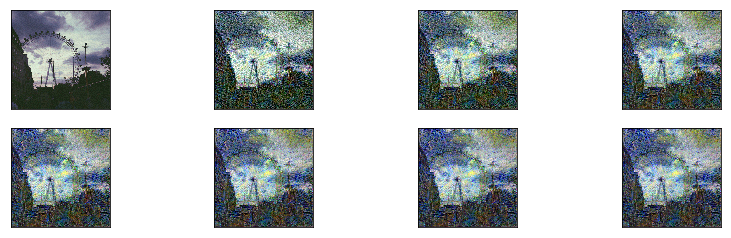

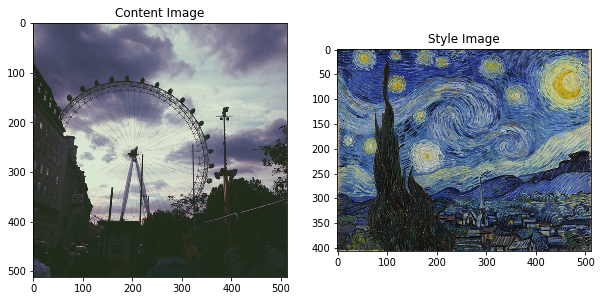

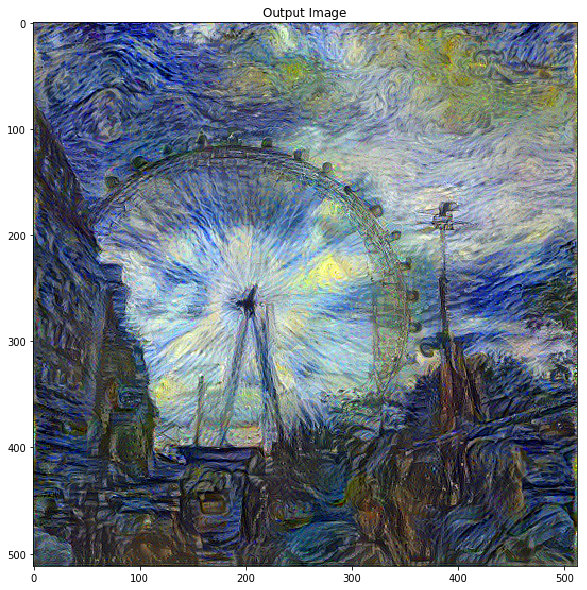

In [24]:
content_path = r'C:\Users\smonk\Pictures\The Sky\ferris_wheel.JPG'
style_path = r'C:\Users\smonk\Pictures\Style Transfer\starry_night.jpg'
best, best_loss = run_style_transfer(content_path, style_path)
show_results(best, content_path, style_path)

### Observations

At Iteration 0, we started with a total loss of $1.6429*10^{8}$. This is all contained within the data's loss. The model's loss is $0.0$ because we have not altered the image at all. After the first iteration, the model loss jumps up significantly. But after that, both the style and content loss continuously decrease throughout the process. 

Some other observations I had while training on different images in a seperate notebook, is that there is a sort of "noise residue" left over from our input noise variables used in the generator's model.  
It seems that as I iterate through this process more an more, the noise does tend to go away - but it is still not completely gone. Unfortunately I did not have the time to run an image for 2000+ iterations to test if there is some point at which the noise residue dissipates completely.  
Something else I did not get around to trying is testing various values for the mean values and selected layers that the article I referenced recommended using without explanation as to how he went about choosing those parameters.  
Another suggestion I was given was to try smaller images. It is possible that with a high-dimensioned image, there are a lot of places for noise to be left and unaltered. In one article, the author used GANs to generate images of distracted drivers. The input and output images used extremely low dimensions and it did not appear that those images had much noise residue.

Below are more generated images from my second notebook that used the same implementation.

![1](https://lh3.googleusercontent.com/YueuqTq5Lr9ecDKP_in8T2YHEyOpUWSn8TXw3AnuuuHgAaYiURXzeE0-NK5Oel7O5WCM87HfIfVG0qAxm6Gi3DJM0IA9J1ry-efOQ2Ua8g1fiTFZwZAm16z3zGnfKoCdV2U-StxqAcM)

![2](https://lh3.googleusercontent.com/C_xIZblxB5Q13zlgk0xNYHXZ2zRO6xjR4MUJejT1LtMUyCIB3mn6ZqmKxF_2zUL2o4YwrqPJ95IF5G3I-DpJojVSMh3vpbQv8wklYePg-g_UtkkmXyM6l03ljYhcSz6VY7iPzxxpxPU)

## Conclusion

After generating multiple images using Neural Style Transfer, I selected the two best images and put my initial question to the test.

I created [a short quiz](https://forms.gle/Q91LJdNzY5KLeegZ7) that asked 3 questions:

* Which painting is generated?
* Which image is generated?
* Which photograph is generated?

I sent this to my friends, family, and peers. 27% to 51% of the 37 participants answered incorrectly. The results support the conclusion that it *is* possible to create content that tricks real people.

This short quiz has interesting implications about the advancements and increase in availability of GANs in relation to DeepFakes and the rise in concern of fake news. Going into this quiz, participants knew that they needed to look out for a generated image, and yet across all three questions, over a quarter of participans could not figure it out. There are many recent news articles that express concern over DeepFakes and how they are leading to "the end of truth". I think these recent articles are hyperbolic and use tactics to try and scare their audience, but they do pose an interesting question: how are people supposed to know that the content they are viewing is real or not especially when they are *not* told that what they are viewing is potentially fake?  
On the bright side, media literacy that allows people to critically think about the media they consume is on the rise. This will allow for a higher level of analysis and evaluation of news, images, and other forms of communication.

Also, the use of GANs is not nearly used with mal-intention as much as today's news makes it out to be. The application of GANs can be adapted not only for creating art, but also used to create new, realistic data for data-sparse fields, a concept known as data-augmentation.


In the end, I learned a lot about GANs and had a lot of fun throughout the process! Getting the opportunity to evaluate a new concept from various perspectives was an invaluable experience.

### References

* [Creswell, et al., 2017] Antonia Creswell, Tom White, Vincent Dumoulin, Kai Arulkumaran, Biswa Sengupta, and Anil A. Bharath, [Generative Adversarial Networks: An Overview](https://arxiv.org/abs/1710.07035), IEEE Signal Processing Magazine Special Issue on Deep Learning for Visual Understanding. 2017.
* [Gatys, et al., 2015] Leon A. Gatys, Alexander S. Ecker, Matthias Bethge, [A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576), arXiv:1508.06576. 2015.
* [Goodfellow, et al., 2014] Ian J. Goodfellow, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, and Yoshua Bengio, [Generative Adversarial Networks](https://arxiv.org/abs/1406.2661), arXiv:1406.2661. 2014.
* [Yuan, 2018] Raymond Yuan, [Neural Style Transfer: Creating Art with Deep Learning using tf.keras and eager execution](https://medium.com/tensorflow/neural-style-transfer-creating-art-with-deep-learning-using-tf-keras-and-eager-execution-7d541ac31398), Medium. 2018

### Word Count

In [25]:
import io
from nbformat import current
import glob
nbfile = glob.glob('Hultin-Project.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Hultin-Project.ipynb is 2431
